In [6]:
import tensorflow as tf
from tensorflow.io import decode_image, read_file
from tensorflow.image import resize_with_crop_or_pad, resize
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [7]:
def get_image(image_path):
    image = decode_image(read_file(image_path))
    image = resize_with_crop_or_pad(image, 256, 256)
    image = resize(image, (224, 224))
    return image

def get_train_dataset(X, y, batch_size=64):    
    path_dataset = tf.data.Dataset.from_tensor_slices(X)
    image_dataset = path_dataset.map(get_image, num_parallel_calls=tf.data.AUTOTUNE)
    
    label_dataset = tf.data.Dataset.from_tensor_slices(tf.cast(y, tf.float32))

    dataset = tf.data.Dataset.zip(image_dataset, label_dataset)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

def get_test_dataset(X):
    path_dataset = tf.data.Dataset.from_tensor_slices(X)
    dataset = path_dataset.map(get_image, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset

In [8]:
def get_datasets():
    labels_df = pd.read_csv('./dataset/training_solutions_rev1.csv')
    
    train_paths = os.listdir('./dataset/images_training_rev1/')
    train_paths = ['./dataset/images_training_rev1/' + path for path in train_paths]
    features = labels_df.values[:, 1:]
    X_train, X_val, y_train, y_val = train_test_split(train_paths, features, test_size=0.2, random_state=0)
    train_dataset = get_train_dataset(X_train, y_train)
    val_dataset = get_train_dataset(X_val, y_val)   
    
    test_paths = os.listdir('./dataset/images_test_rev1/')
    X_test = ['./dataset/images_test_rev1/' + path for path in test_paths]
    test_dataset = get_test_dataset(X_test)
    return train_dataset, val_dataset, test_dataset

In [9]:
train_dataset, val_dataset, test_dataset = get_datasets()

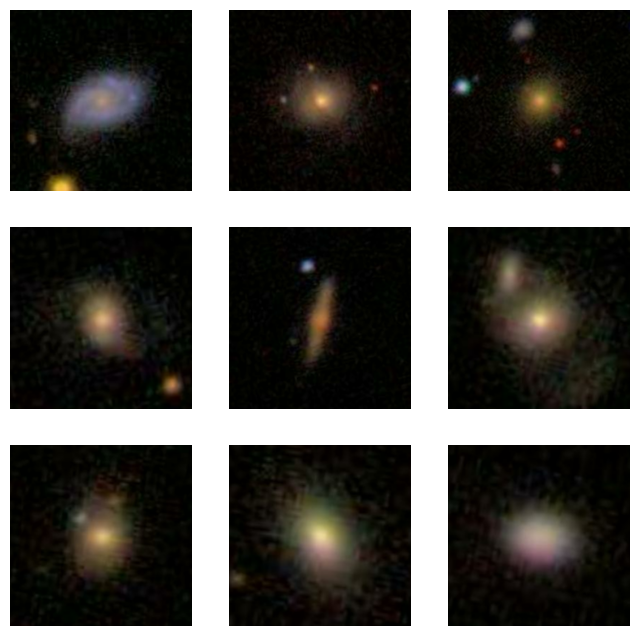

In [10]:
plt.figure(figsize=(8, 8))

# first 3 images of training dataset
for image, labels in train_dataset.take(1):
    for i in range(3):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.axis("off")
        
# first 3 images of validation dataset
for image, labels in val_dataset.take(1):
    for j in range(3):
        ax = plt.subplot(3, 3, j+4)
        plt.imshow(image[j].numpy().astype("uint8"))
        plt.axis("off")

# first 3 images of test dataset
k = 0
for image in test_dataset.take(3):
    ax = plt.subplot(3, 3, k+7)
    plt.imshow(image.numpy().astype("uint8"))
    plt.axis("off")
    k += 1